<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Logistic Regression

---


### Introduction
Logistic regression is a famous classifier still used frequently today, despite its age. It _is_ a regression, but don't let that confuse you: it operates as a classifier. It estimates probabilities of class membership



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load the data and create the target and predictor matrix
- The target will be a binary column of whether the home team wins.
- The predictors should be numeric statistics columns.

We're going to exclude these columns from the predictor matrix:

    ['GameId','GameDate','GameTime','HostName',
     'GuestName','total_score','total_line','game_line',
     'winner','loser','host_wins','Season']

In [3]:
# load the data
data = pd.read_csv('./datasets/basketball_data.csv')

In [4]:
# Visualize the DataFrame by calling head method
data.head()

,Season,GameId,GameDate,GameTime,HostName,GuestName,total_score,total_line,game_line,Host_HostRank,...,gPTS_avg10,gTS%_avg10,g3PAR_avg10,gFTr_avg10,gDRB%_avg10,gTRB%_avg10,gAST%_avg10,gSTL%_avg10,gBLK%_avg10,gDRtg_avg10
0,2013,201212090LAL,2012-12-09,6:30 pm,Los Angeles Lakers,Utah Jazz,227.0,207.5,7.5,13,...,99.0,0.5206,0.2230,0.2981,69.22,50.05,61.57,8.63,10.31,110.87
1,2013,201212100PHI,2012-12-10,7:00 pm,Philadelphia 76ers,Detroit Pistons,201.0,186.5,5.5,13,...,90.3,0.5077,0.2144,0.3095,71.46,49.48,59.83,6.48,9.46,107.91
2,2013,201212100HOU,2012-12-10,7:00 pm,Houston Rockets,San Antonio Spurs,240.0,212.0,-7.0,12,...,108.0,0.5915,0.2743,0.2518,74.26,50.99,61.82,8.30,6.85,101.41
3,2013,201212110BRK,2012-12-11,7:00 pm,Brooklyn Nets,New York Knicks,197.0,195.5,-3.5,12,...,100.3,0.5473,0.3595,0.2544,74.23,47.88,52.07,9.31,7.64,109.24
4,2013,201212110DET,2012-12-11,7:30 pm,Detroit Pistons,Denver Nuggets,195.0,203.5,-4.5,11,...,101.1,0.5605,0.2173,0.3177,68.45,50.40,56.33,7.67,7.83,114.86


In [7]:
# Concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 96 columns):
Season                3768 non-null int64
GameId                3768 non-null object
GameDate              3768 non-null object
GameTime              3768 non-null object
HostName              3768 non-null object
GuestName             3768 non-null object
total_score           3768 non-null float64
total_line            3768 non-null float64
game_line             3768 non-null float64
Host_HostRank         3768 non-null int64
Host_GameRank         3768 non-null int64
Guest_GuestRank       3768 non-null int64
Guest_GameRank        3768 non-null int64
host_win_count        3768 non-null int64
host_lose_count       3768 non-null int64
guest_win_count       3768 non-null int64
guest_lose_count      3768 non-null int64
game_behind           3768 non-null float64
winner                3768 non-null object
loser                 3768 non-null object
host_place_streak     3768 non-null in

In [5]:
# Check column names
data.columns

Index([u'Season', u'GameId', u'GameDate', u'GameTime', u'HostName',
       u'GuestName', u'total_score', u'total_line', u'game_line',
       u'Host_HostRank', u'Host_GameRank', u'Guest_GuestRank',
       u'Guest_GameRank', u'host_win_count', u'host_lose_count',
       u'guest_win_count', u'guest_lose_count', u'game_behind', u'winner',
       u'loser', u'host_place_streak', u'guest_place_streak', u'hq1_avg10',
       u'hq2_avg10', u'hq3_avg10', u'hq4_avg10', u'hPace_avg10',
       u'heFG%_avg10', u'hTOV%_avg10', u'hORB%_avg10', u'hFT/FGA_avg10',
       u'hORtg_avg10', u'hFG_avg10', u'hFGA_avg10', u'hFG%_avg10',
       u'h3P_avg10', u'h3PA_avg10', u'h3P%_avg10', u'hFT_avg10', u'hFTA_avg10',
       u'hFT%_avg10', u'hORB_avg10', u'hDRB_avg10', u'hTRB_avg10',
       u'hAST_avg10', u'hSTL_avg10', u'hBLK_avg10', u'hTOV_avg10',
       u'hPF_avg10', u'hPTS_avg10', u'hTS%_avg10', u'h3PAR_avg10',
       u'hFTr_avg10', u'hDRB%_avg10', u'hTRB%_avg10', u'hAST%_avg10',
       u'hSTL%_avg10', u'hBLK%_

In [8]:
# Check the dimentionality
data.shape

(3768, 96)

In [9]:
# Check unique values in "Season" column
data.Season.unique()

array([2013, 2014, 2015, 2016])

In [10]:
# Check the values in "winner" column
data.winner.head()

0             Utah Jazz
1    Philadelphia 76ers
2     San Antonio Spurs
3       New York Knicks
4        Denver Nuggets
Name: winner, dtype: object

In [11]:
# Let's create our target variable: does the home team win?
data['host_wins'] = (data.HostName == data.winner).astype(int)

In [12]:
predictors = [c for c in data.columns if c not in ['GameId','GameDate','GameTime','HostName',
                                                   'GuestName','total_score','total_line','game_line',
                                                   'winner','loser','host_wins','Season']]
X = data[predictors]
y = data.host_wins.values

### Create the training and testing data
- Test data should be the 2016 season data, train data will be the previous seasons.
- Make sure to standardize your predictor matrix (easiest to do prior to splitting the data into training and testing... but techinically not totally correct)!

In [13]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [14]:
# Standardize the data
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [15]:
# Train/Test Split 
X_train = Xs[data.Season.isin([2013, 2014, 2015])]
X_test = Xs[data.Season == 2016]

y_train = y[data.Season.isin([2013, 2014, 2015])]
y_test = y[data.Season == 2016]

In [16]:
# Baseline accuracy
print np.mean(y_test)

0.603045685279


In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# Fit default model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# The defaul model accuracy
print lr.score(X_test, y_test)

0.695431472081


In [18]:
# Create a DataFrame with coefficients and it's equivalent in percents
coef_df = pd.DataFrame({
        'features': X.columns,
        'log odds': lr.coef_[0],
        'percentage change in odds': np.round(np.exp(lr.coef_[0])*100-100,2)
    })

In [19]:
coef_df.sort_values(by='percentage change in odds', ascending=0)

,features,log odds,percentage change in odds
65,gFTA_avg10,0.756843,113.15
7,guest_lose_count,0.610829,84.20
64,gFT_avg10,0.581028,78.79
3,Guest_GameRank,0.581064,78.79
82,gSTL%_avg10,0.522280,68.59
34,hSTL_avg10,0.497737,64.50
41,hFTr_avg10,0.468858,59.82
75,gPTS_avg10,0.422056,52.51
54,gTOV%_avg10,0.371102,44.93
21,hFG_avg10,0.343389,40.97


In [20]:
# Create a subset of "coef_df" DataFrame with most important coefficients
imp_coefs = pd.concat([coef_df.sort_values(by='percentage change in odds', ascending=0).head(10),
                     coef_df.sort_values(by='percentage change in odds', ascending=0).tail(10)])

In [21]:
imp_coefs.set_index('features', inplace=True)

In [22]:
imp_coefs

,log odds,percentage change in odds
features,,
gFTA_avg10,0.756843,113.15
guest_lose_count,0.610829,84.20
gFT_avg10,0.581028,78.79
Guest_GameRank,0.581064,78.79
gSTL%_avg10,0.522280,68.59
hSTL_avg10,0.497737,64.50
hFTr_avg10,0.468858,59.82
gPTS_avg10,0.422056,52.51
gTOV%_avg10,0.371102,44.93


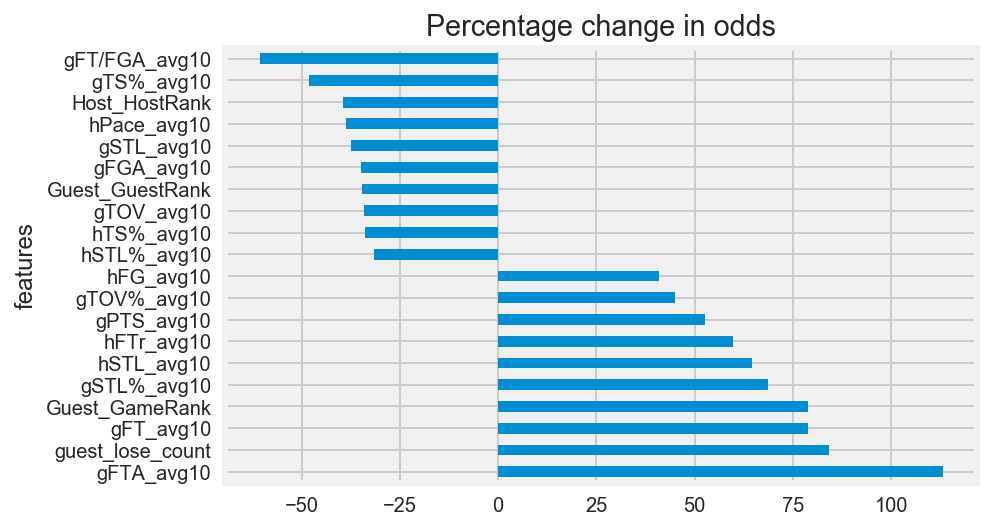

In [23]:
# Plot important coefficients
imp_coefs['percentage change in odds'].plot(kind = "barh")
plt.title("Percentage change in odds")
plt.show()

In [24]:
# Set up the parameters. Looking at C regularization strengths on a log scale.


gs_params = {
    'penalty':['l2'],
    'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag'],
    'C':np.logspace(-5,5,100)
}
from sklearn.model_selection import GridSearchCV
lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=1, n_jobs=-1)


In [25]:
lr_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.1s
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:   21

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': array([  1.00000e-05,   1.26186e-05, ...,   7.92483e+04,   1.00000e+05]), 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [26]:
# best score on the training data:
lr_gridsearch.best_score_

0.65648580668343515

In [27]:
# best parameters on the training data:
lr_gridsearch.best_params_

{'C': 0.0042292428743894986, 'penalty': 'l2', 'solver': 'newton-cg'}

In [28]:
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

In [29]:
# Score it on the testing data:
best_lr.score(X_test, y_test)

0.70558375634517767

In [30]:
# slightly better than the default.

In [31]:
coef_df = pd.DataFrame({
        'features': X.columns,
        'log odds': best_lr.coef_[0],
        'percentage change in odds': np.round(np.exp(best_lr.coef_[0])*100-100,2)
    })

In [32]:
coef_df.sort_values(by='percentage change in odds', ascending=0)

,features,log odds,percentage change in odds
8,game_behind,0.252753,28.76
7,guest_lose_count,0.156074,16.89
84,gDRtg_avg10,0.106095,11.19
4,host_win_count,0.103181,10.87
50,gq3_avg10,0.071043,7.36
52,gPace_avg10,0.050970,5.23
45,hSTL%_avg10,0.050613,5.19
20,hORtg_avg10,0.048234,4.94
63,g3P%_avg10,0.047297,4.84
34,hSTL_avg10,0.046941,4.81


In [33]:
# Create a subset of "coef_df" DataFrame with most important coefficients
imp_coefs = pd.concat([coef_df.sort_values(by='percentage change in odds', ascending=0).head(10),
                     coef_df.sort_values(by='percentage change in odds', ascending=0).tail(10)])

In [34]:
imp_coefs.set_index('features', inplace=True)

In [35]:
imp_coefs

,log odds,percentage change in odds
features,,
game_behind,0.252753,28.76
guest_lose_count,0.156074,16.89
gDRtg_avg10,0.106095,11.19
host_win_count,0.103181,10.87
gq3_avg10,0.071043,7.36
gPace_avg10,0.050970,5.23
hSTL%_avg10,0.050613,5.19
hORtg_avg10,0.048234,4.94
g3P%_avg10,0.047297,4.84


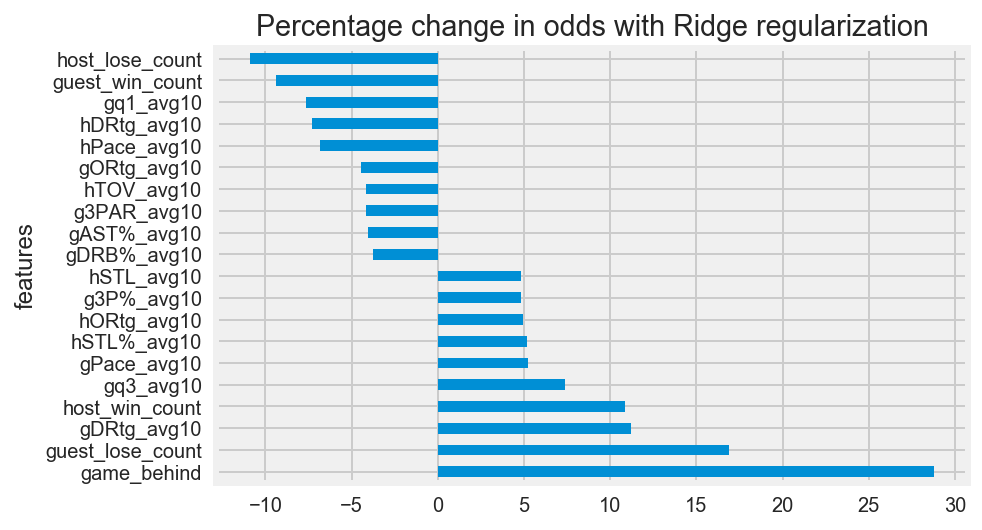

In [36]:
# Plot important coefficients
imp_coefs['percentage change in odds'].plot(kind = "barh")
plt.title("Percentage change in odds with Ridge regularization")
plt.show()

What are the interpretations of these coefficients?  
Example:

For every one unit increase in "game_behind", the percentage change in odds of winning (versus loosing) increases by 28%.

For every one unit increase in "host_lose_count", the percentage change in odds of winning (versus loosing) decreaese by 11%.